In [15]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sqlite3
from sqlite3 import Error
 

import pandas as pd
import yellowbrick


#Step 1:  Load data into a dataframe

List = []



In [16]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
 
    return conn
 
 
def query_db(conn, priority):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT month_text_name, fm_m,day_of_week_num,[Violation Charged Code], [Violation Description], [Violation Year],[Violation Month], [Violation Day of Week],[Age at Violation],Gender,[State of License],[Police Agency],Court, Source FROM get_data_2017 ")
 
    rows = cur.fetchall()
 
    for row in rows:
        List.append(row)
 
 

 
def main():
    database = r"study.sqlite3"
 
    # create a database connection
    conn = create_connection(database)
    with conn:
        print("1. Query task by priority:")
        query_db(conn,1)
        print("end run")
        print(List[0])
       
 
if __name__ == '__main__':
    main()
    
    data = pd.DataFrame(List,columns=['month_text_name','fm_m','day_of_week_num','Violation Charged Code', 'Violation Description', 'Violation Year','Violation Month', 'Violation Day of Week','Age at Violation','Gender','State of License','Police Agency','Court', 'Source'])
   

1. Query task by priority:
end run
('Decemnber', 1, 4, '1225D', 'OPER MV WHILE USING PORTABLE ELEC DEV', 2017, 12, 'WEDNESDAY', 23, 'F', 'NEW YORK', 'ADAMS STATE POLICE', 'ADAMS TOWN COURT', 'TSLED')


In [3]:
print("The dimension of the table is: ", data.shape)


The dimension of the table is:  (1429699, 14)


In [4]:
print("##############Describe Data#########")
print()
print(data.describe())
print()
print("@@@@@@@@@@@@Summarized Data@@@@@@@@@")
print( )

print(data.describe(include=['O']))

##############Describe Data#########

               fm_m  day_of_week_num  Violation Year  Violation Month  \
count  1.429699e+06     1.429699e+06       1429699.0     1.429699e+06   
mean   1.628297e+00     4.043911e+00          2017.0     1.028545e+01   
std    4.832597e-01     2.004556e+00             0.0     1.072663e+00   
min    1.000000e+00     1.000000e+00          2017.0     9.000000e+00   
25%    1.000000e+00     2.000000e+00          2017.0     9.000000e+00   
50%    2.000000e+00     4.000000e+00          2017.0     1.000000e+01   
75%    2.000000e+00     6.000000e+00          2017.0     1.100000e+01   
max    2.000000e+00     7.000000e+00          2017.0     1.200000e+01   

       Age at Violation  
count      1.429699e+06  
mean       3.662854e+01  
std        1.464745e+01  
min        1.600000e+01  
25%        2.400000e+01  
50%        3.300000e+01  
75%        4.800000e+01  
max        9.500000e+01  

@@@@@@@@@@@@Summarized Data@@@@@@@@@

       month_text_name Violatio

In [5]:
data.head(10)

,month_text_name,fm_m,day_of_week_num,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
0,Decemnber,1,4,1225D,OPER MV WHILE USING PORTABLE ELEC DEV,2017,12,WEDNESDAY,23,F,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED
1,Decemnber,2,3,37530,DRIVERS VIEW OBSTRUCTED,2017,12,TUESDAY,18,M,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED
2,Decemnber,2,3,3752A1,NO/INADEQUATE HEADLAMPS,2017,12,TUESDAY,18,M,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED
3,Decemnber,2,3,306B,UNINSPECTED MOTOR VEHICLE,2017,12,TUESDAY,18,M,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED
4,Decemnber,2,1,1144-AA,FLD DUE CARE FOR EMERG VEH STOPPED OR STANDING,2017,12,SUNDAY,28,M,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED
5,Decemnber,2,1,1129A,FOLLOWING TOO CLOSELY,2017,12,SUNDAY,28,M,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED
6,Decemnber,2,7,1229C3,NO SEAT BELT ADULT,2017,12,SATURDAY,25,M,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED
7,Decemnber,1,2,3751A,INADEQUATE STEERING/BRAKES/HORN,2017,12,MONDAY,26,F,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED
8,Decemnber,2,6,1180B,SPEED OVER 55 ZONE,2017,12,FRIDAY,21,M,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED
9,Decemnber,1,6,1180A,SPEED NOT REASONABLE AND PRUDENT,2017,12,FRIDAY,22,F,NEW YORK,ADAMS STATE POLICE,ADAMS TOWN COURT,TSLED


Text(0.5, 1.0, 'Trafffic Violation By  Day of Week')

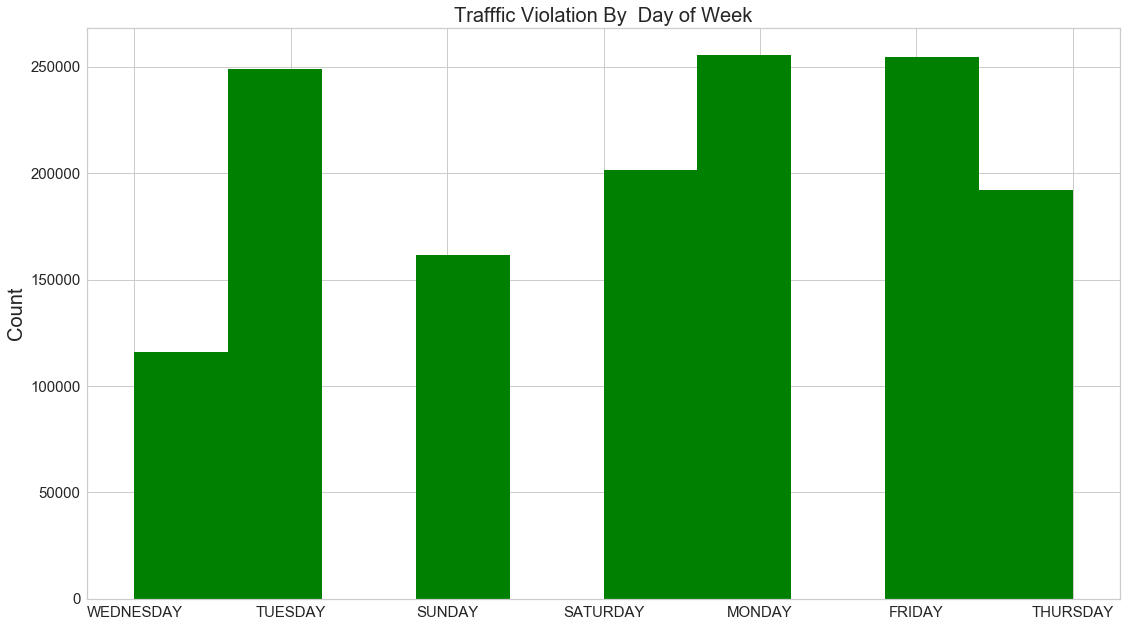

In [8]:
# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)
# set up the figure size
#plt.rcParams['figure.figsize'] = (34, 60)
fig.set_size_inches(18.5, 10.5)





#data_copy = data.dropna()


axes.hist(data["Violation Day of Week"], facecolor='green')
axes.set_ylabel('Count',fontsize = 20)
axes.tick_params(axis='both', labelsize=15)
axes.set_title('Trafffic Violation By  Day of Week',fontsize = 20)


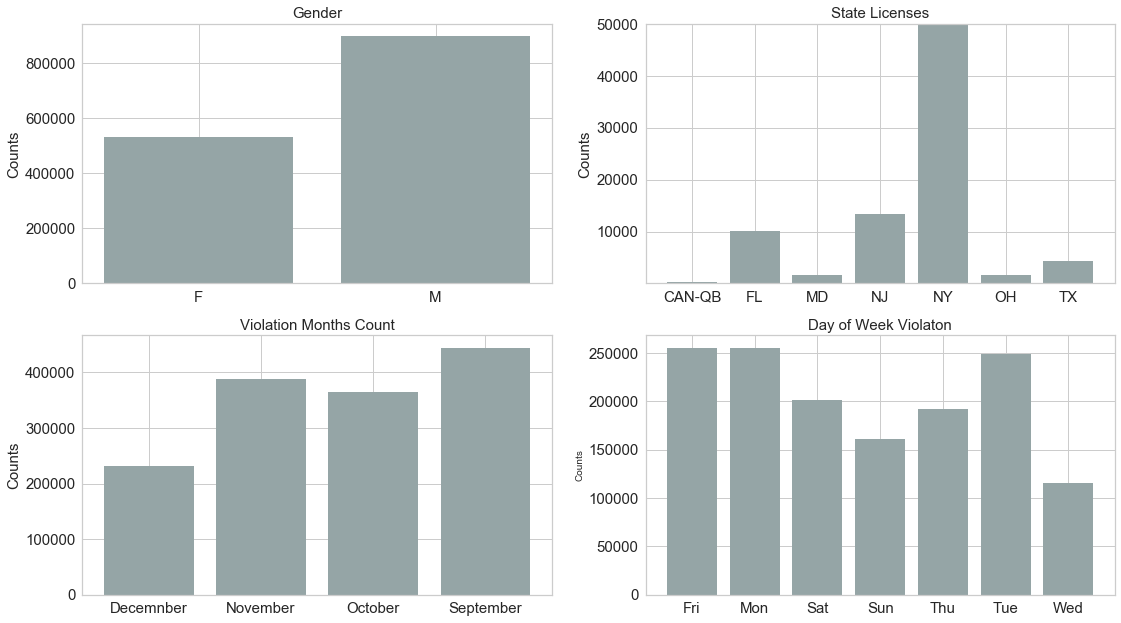

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# set up the figure size
plt.rcParams['figure.figsize'] = (34, 60)
fig.set_size_inches(18.5, 10.5)

# make the data read to feed into the visulizer
X_gender = data.groupby('Gender').size().reset_index(name='Counts')['Gender']
Y_gender = data.groupby('Gender').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_gender, Y_gender,  color='#95a5a6')
axes[0, 0].set_title('Gender', fontsize=15)
axes[0, 0].set_ylabel('Counts', fontsize=15)
axes[0, 0].tick_params(axis='both', labelsize=15)



X_violation_month = data.groupby('month_text_name').size().reset_index(name='Counts')['month_text_name']
Y_violation_month = data.groupby('month_text_name').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_violation_month, Y_violation_month, color = '#95a5a6')
axes[1, 0].set_title('Violation Months Count', fontsize=15)
axes[1, 0].set_ylabel('Counts', fontsize=15)
axes[1, 0].tick_params(axis='both', labelsize=15)


X_state_of_license = data.replace({'State of License': {"FLORIDA":'FL',"OHIO": 'OH', "QUEBEC CANADA": 'CAN-QB',"TEXAS":"TX","MARYLAND":"MD","NEW YORK":"NY","NEW JERSEY":"NJ"}}).groupby('State of License').size().reset_index(name='Counts')['State of License']
Y_state_of_license = data.replace({'State of License': { "FLORIDA":"FL",   "OHIO": 'OH', "QUEBEC CANADA": 'CAN-QB',"TEXAS":"TX","MARYLAND":"MD","NEW YORK":"NY","NEW JERSEY":"NJ"}}).groupby('State of License').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_state_of_license, Y_state_of_license, color = '#95a5a6')
axes[0, 1].set_title('State Licenses', fontsize=15)
axes[0, 1].set_ylabel('Counts', fontsize=15)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].set_ylim([1,50000])




X_violation_day_of_week = data.replace({'Violation Day of Week': {"SUNDAY": 'Sun', "MONDAY": 'Mon',"TUESDAY":"Tue","WEDNESDAY":"Wed","THURSDAY":"Thu","FRIDAY":"Fri","SATURDAY":"Sat"}}).groupby('Violation Day of Week').size().reset_index(name='Counts')['Violation Day of Week']
Y_violation_day_of_week = data.replace({'Violation Day of Week': {"SUNDAY": 'Sun', "MONDAY": 'Mon',"TUESDAY":"Tue","WEDNESDAY":"Wed","THURSDAY":"Thu","FRIDAY":"Fri","SATURDAY":"Sat"}}).groupby('Violation Day of Week').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_violation_day_of_week, Y_violation_day_of_week ,color = '#95a5a6')
axes[1, 1].set_title('Day of Week Violaton', fontsize=15)
axes[1, 1].set_ylabel('Counts', fontsize=10)
axes[1, 1].tick_params(axis='both', labelsize=15)




plt.show()


fig.tight_layout()

In [12]:
data_filter = data

In [13]:
data_filter.shape
#data_filter.head()
#data.head()

(1429699, 14)

In [ ]:

#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['F', 'M']
num_features = ['Age at Violation', 'Violation Month','day_of_week_num']



# copy data to a new dataframe
data_norm = data_filter
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.Gender.as_matrix()

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();



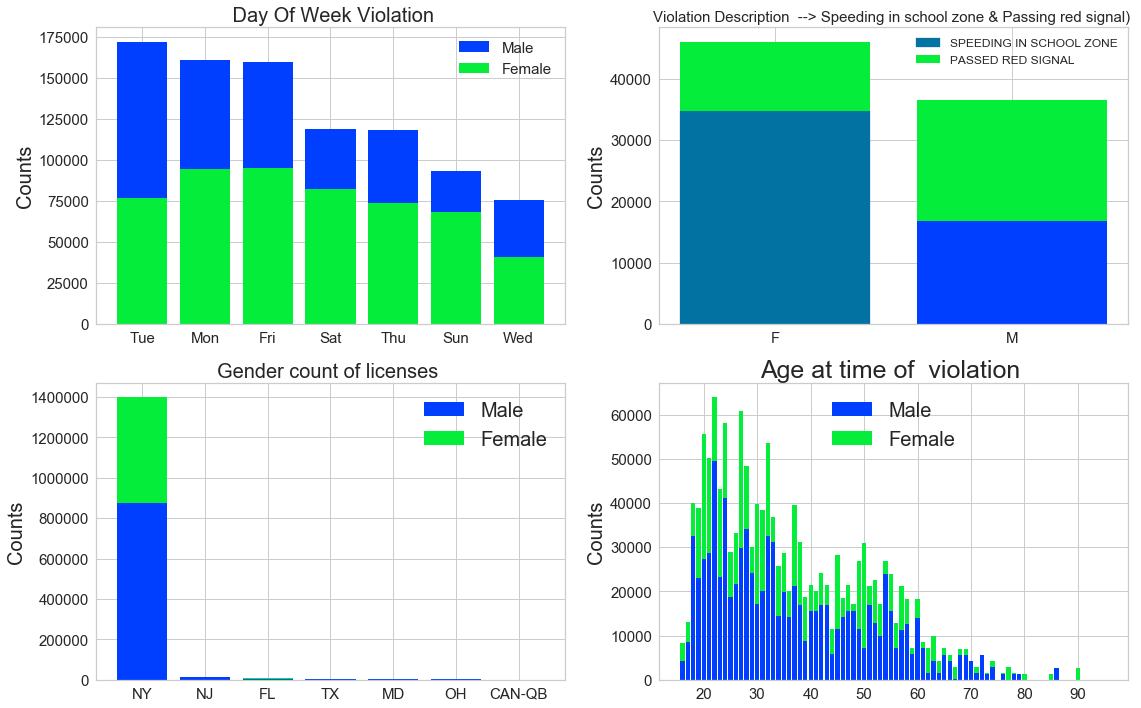

In [20]:
# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (27, 15)

#fig.set_size_inches(18.5, 6)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(18.5, 12)
# make the data read to feed into the visulizer

gender_phone_violation = data.replace({'Violation Day of Week':{'SUNDAY':'Sun',"MONDAY":'Mon',"TUESDAY":'Tue',"WEDNESDAY":'Wed',"THURSDAY":"Thu","FRIDAY":'Fri',"SATURDAY":'Sat'}})[data["Gender"] == "M"]["Violation Day of Week"].value_counts()

gender_phone_violation_not =data.replace({'Violation Day of Week':{'SUNDAY':'Sun',"MONDAY":'Mon',"TUESDAY":'Tue',"WEDNESDAY":'Wed',"THURSDAY":"Thu","FRIDAY":'Fri',"SATURDAY":'Sat'}})[data["Gender"]== "F"]["Violation Day of Week"].value_counts()

gender_phone_violation_not = gender_phone_violation_not.reindex(index = gender_phone_violation.index)

# make the bar plot
p1 = axes[0, 0].bar(gender_phone_violation.index, gender_phone_violation.values)
p2 = axes[0, 0].bar(gender_phone_violation_not.index, gender_phone_violation_not.values )
axes[0, 0].set_title('Gender', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Male', 'Female'), fontsize = 15)
axes[0, 0].set_title(' Day Of Week Violation', fontsize=20)



# make the data read to feed into the visulizer

gender_school_zone = data[data["Violation Description"]== "SPEEDING IN SCHOOL ZONE" ]["Gender"].value_counts()
gender_passed_red_signal = data[ data["Violation Description"]== "PASSED RED SIGNAL" ]["Gender"].value_counts()
gender_passed_red_signal = gender_passed_red_signal.reindex(index =gender_school_zone.index)





# make the bar plot
p3 = axes[0, 1].bar(gender_school_zone.index, gender_school_zone.values )
p4 = axes[0,1].bar(gender_passed_red_signal.index,gender_passed_red_signal.values, bottom=gender_school_zone.values)
p3[0].set_color('g')
p3[0].set_color('b')

axes[0, 1].set_title('Day Of Week', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('SPEEDING IN SCHOOL ZONE', 'PASSED RED SIGNAL'), fontsize = 12 )
axes[0, 1].set_title('Violation Description  --> Speeding in school zone & Passing red signal) ', fontsize=15)






# make the data read to feed into the visulizer

gender_male = data.replace({'State of License': {"FLORIDA":"FL", "OHIO": 'OH', "QUEBEC CANADA": 'CAN-QB',"TEXAS":"TX","MARYLAND":"MD","NEW YORK":"NY","NEW JERSEY":"NJ"}})[data["Gender"]== "M" ]["State of License"].value_counts()
gender_female = data.replace({'State of License': {"FLORIDA":'FL',"OHIO": 'OH', "QUEBEC CANADA": 'CAN-QB',"TEXAS":"TX","MARYLAND":"MD","NEW YORK":"NY","NEW JERSEY":"NJ"}})[ data["Gender"]== "F" ]["State of License"].value_counts()
gender_female = gender_female.reindex(index = gender_male.index)

# make the bar plot
p5 = axes[1, 0].bar(gender_male.index, gender_male.values)
p6 = axes[1,0].bar(gender_female.index,gender_female.values, bottom=gender_male.values)
axes[1, 0].set_title('Gender count of licenses ', fontsize=20)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Male', 'Female'), fontsize = 20)



gender_male_age = data[data["Gender"]== "M" ]["Age at Violation"].value_counts()
gender_female_age = data[ data["Gender"]== "F" ]["Age at Violation"].value_counts()
gender_female_age = gender_female_age.reindex(index = gender_male_age.index)


# make the bar plot
p7 = axes[1, 1].bar(gender_male_age.index, gender_male_age.values)
p8 = axes[1,1].bar(gender_female_age.index,gender_female_age.values, bottom=gender_male_age.values)
axes[1, 1].set_title('Age at time of  violation ', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Male', 'Female'), fontsize = 20)



In [ ]:
from pandas.plotting import scatter_matrix
data.corr()
scatter_matrix(data,figsize=(16, 12), alpha = .3)



In [18]:
data.corr(method='pearson')

,fm_m,day_of_week_num,Violation Year,Violation Month,Age at Violation
fm_m,1.000000,-0.013181,NaN,0.014541,-0.001365
day_of_week_num,-0.013181,1.000000,NaN,0.038850,-0.003675
Violation Year,NaN,NaN,NaN,NaN,NaN
Violation Month,0.014541,0.038850,NaN,1.000000,-0.015764
Age at Violation,-0.001365,-0.003675,NaN,-0.015764,1.000000


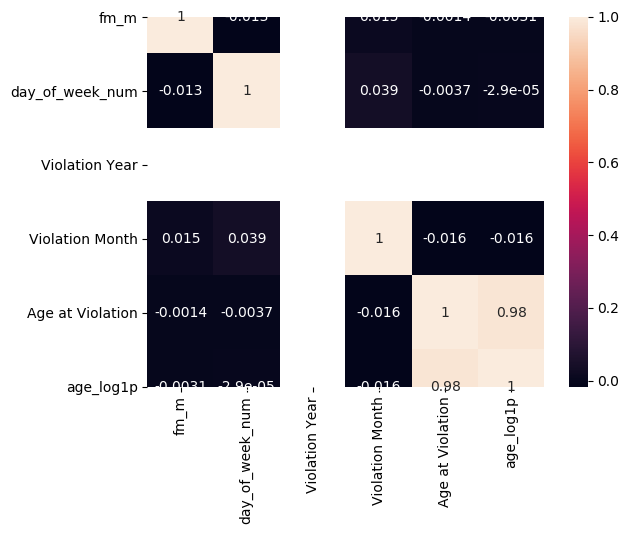

In [28]:
import seaborn as sb
#plt.figure(figsize =(8,5))
sb.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
import seaborn as sns

list_x=[] 
list_y=[]
for x in data["Age at Violation"]:
    if x != '':
        list_x.append(int(x)) 
    else :
        list_x.append(0)
plt.figure(figsize =(19,9))
   
plt.hist(list_x,20, facecolor='green', alpha=0.5 )
plt.title('Age At Time Of Violation',fontsize = 20)
plt.xlabel('Age Ranges', fontsize=7)
plt.ylabel('Count', fontsize = 7)
plt.grid(axis='y', alpha=0.75)
plt.show()

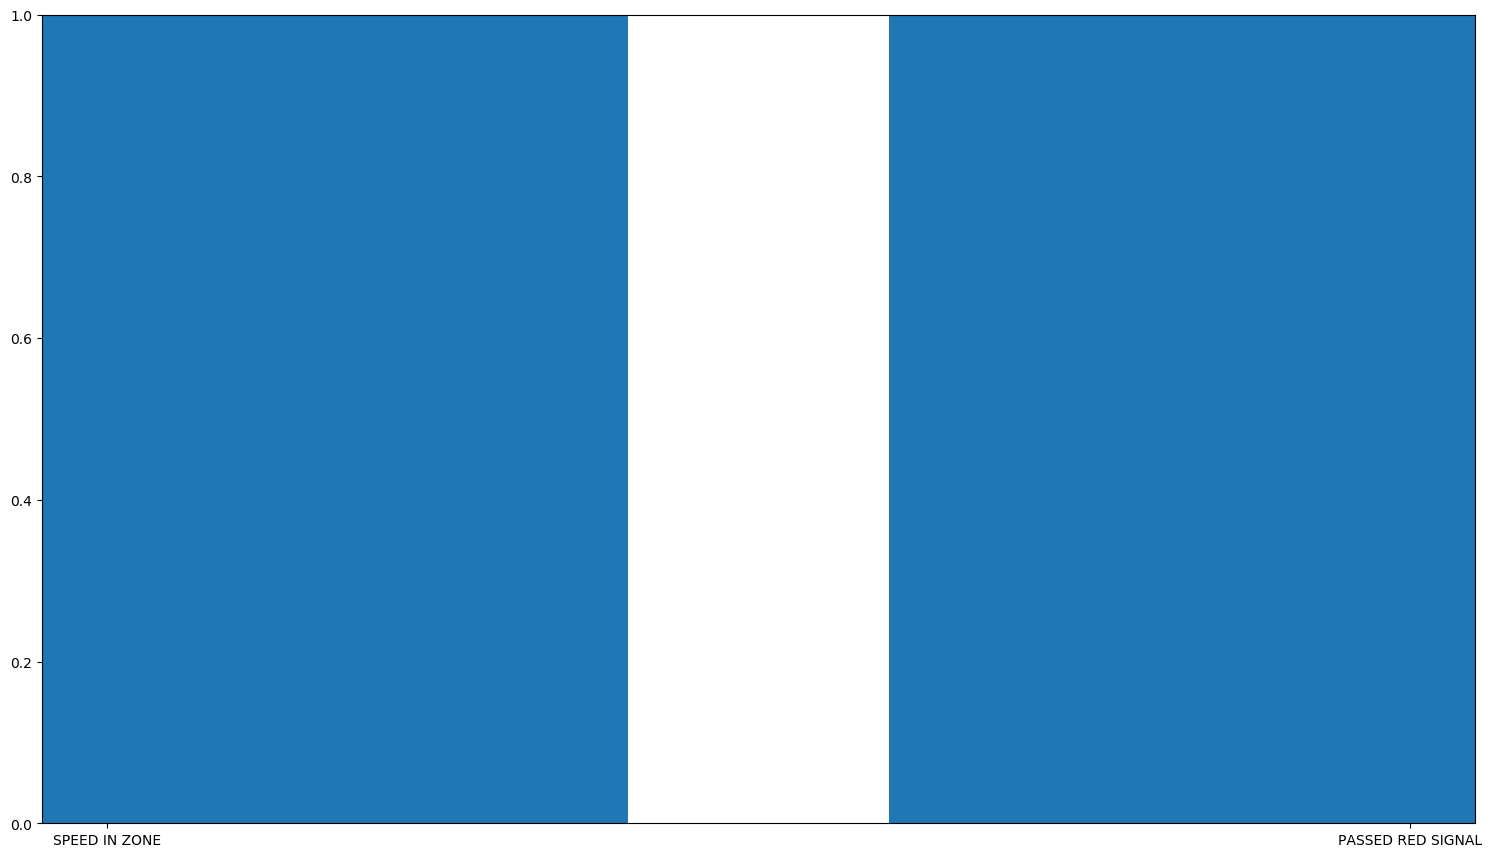

In [29]:
data["Violation_Description"] =data["Violation Description"]
plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
filter_list = [ 'PASSED RED SIGNAL', 'SPEED IN ZONE']
ax.bar('Violation Description', 'Age at Violation', data =data[data.Violation_Description.isin(filter_list)])
                                                                   
#ax.set_yticks(y_pos)
#ax.set_yticklabels(data.loc[data['Violation Description'] == 'SPEED OVER 55 ZONE'])
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Performance')
#ax.set_title('Filter out violations Speed')

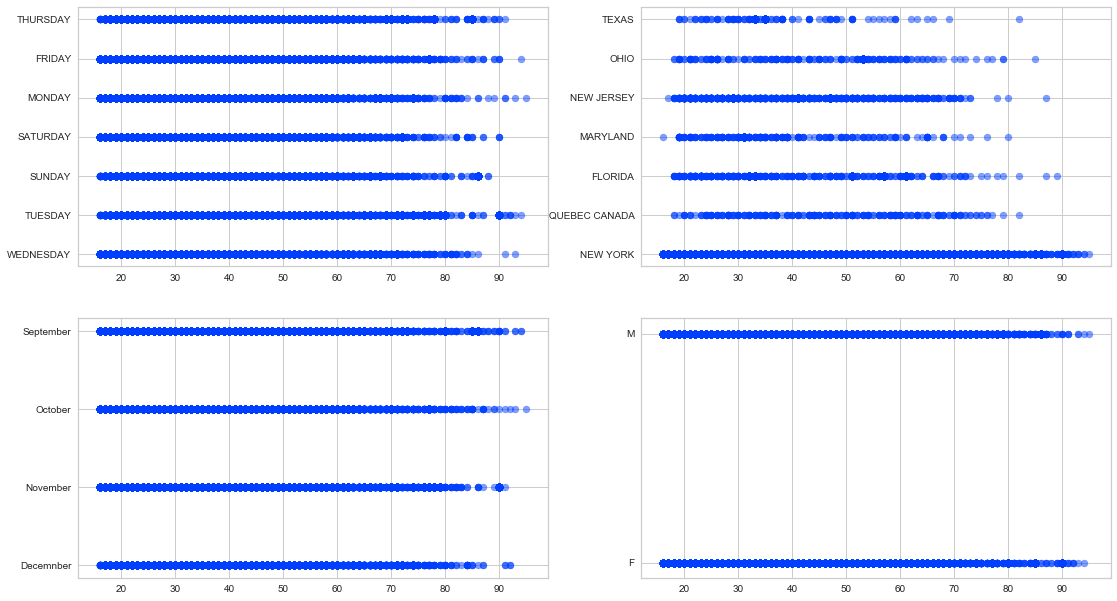

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# set up the figure size

fig.set_size_inches(18.5, 10.5)



axes[0, 0].scatter('Age at Violation', 'Violation Day of Week', alpha=0.5,data= data)
axes[0, 1].scatter('Age at Violation','State of License',  alpha=0.5,data= data)
axes[1, 0].scatter('Age at Violation', 'month_text_name', alpha=0.5,data= data)
axes[1 ,1].scatter('Age at Violation', 'Gender', alpha=0.5,data= data)






In [22]:
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Age at Violation'])

# check the result

print()
print()
print("Check for missing value in [Age at Violation] database field")
print()
print()
print(data['Age at Violation'].describe())

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('Missing ??', inplace=inplace)

fill_na_most(data['State of License'])

# check the result
print()
print()
print("Check for missing value in [State of License] database field")
print()
print()
print(data['State of License'].describe())



Check for missing value in [Age at Violation] database field


count    1.429699e+06
mean     3.662854e+01
std      1.464745e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.300000e+01
75%      4.800000e+01
max      9.500000e+01
Name: Age at Violation, dtype: float64


Check for missing value in [State of License] database field


count      1429699
unique           7
top       NEW YORK
freq       1398405
Name: State of License, dtype: object


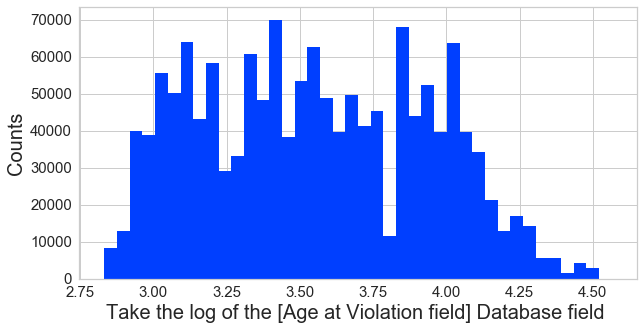

In [24]:
#Step 12 - adjust skewed data (fare)
#check the distribution using histogram
# set up the figure size
#%matplotlib inline

def log_transformation(data):
    return data.apply(np.log1p)

data['age_log1p'] = log_transformation(data['Age at Violation'])



plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['age_log1p'], bins=40)
plt.xlabel('Take the log of the [Age at Violation field] Database field ', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

In [21]:


#Step 13 - convert categorical data to numbers
#get the categorical data D
cat_features = [ "Violation Month",'day_of_week_num','Age at Violation','Court','Violation Description']
data_cat = data[cat_features]

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

# check the data
print(data_cat_dummies.head(8))
#print(data_cat_dummies['Court'].head())

   Violation Month  day_of_week_num  Age at Violation  Court_ADAMS TOWN COURT  \
0               12                4                23                       1   
1               12                3                18                       1   
2               12                3                18                       1   
3               12                3                18                       1   
4               12                1                28                       1   
5               12                1                28                       1   
6               12                7                25                       1   
7               12                2                26                       1   

   Court_ADAMS VILLAGE COURT  Court_ADDISON TOWN COURT  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0          

In [9]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Violation Month', 'Age at Violation','day_of_week_num']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data['Gender']
# separate data into training and validation and check the details of the datasets
# import packages


In [12]:
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print(' number in  training set:')
print(y_train.value_counts())

print('\n')
print(' number  in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  1000789
No. of samples in validation set: 428910


 number in  training set:
M    628861
F    371928
Name: Gender, dtype: int64


 number  in the validation set:
M    269415
F    159495
Name: Gender, dtype: int64


In [13]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


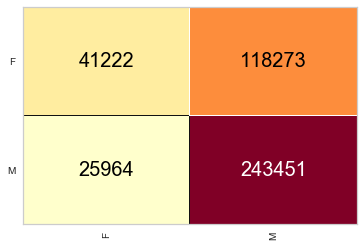

In [14]:
#The ConfusionMatrix visualizer taxes a model
classes = ['F','M']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

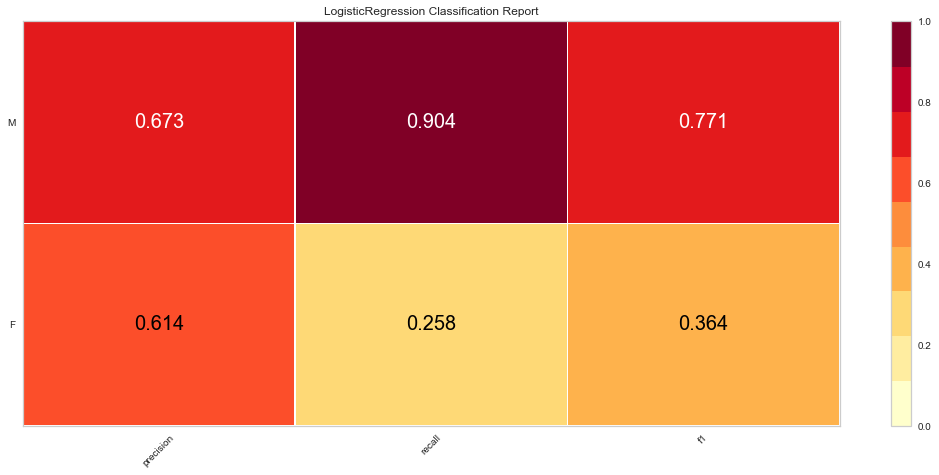

In [16]:
#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

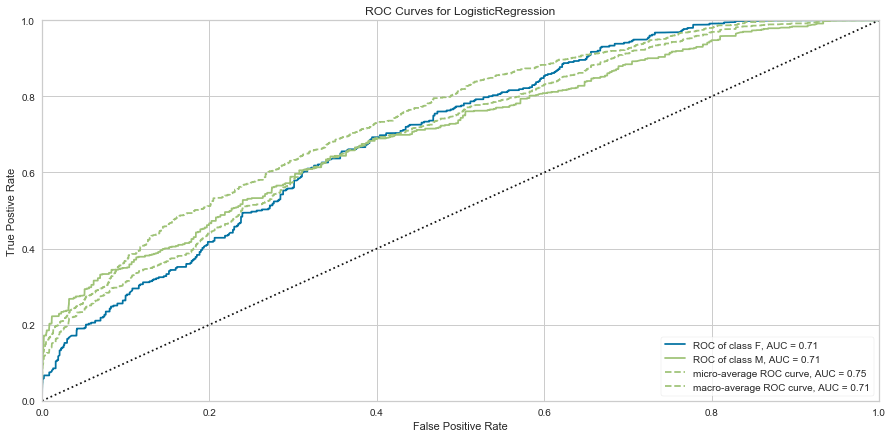

In [17]:


# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()